# Quality Assessment
Now it's your turn. Follow the steps on the platform and use what you've learnt to see how reliable the data is.

In [ ]:
import pandas as pd

Load our cleaned DataFrames

In [ ]:
# orders_cl.csv
url = "https://drive.google.com/file/d/1Tla62vfu__kCqvgypZyVt2S9VuC016yH/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_cl = pd.read_csv(path)

# orderlines_cl.csv
url = "https://drive.google.com/file/d/1OhtkQS2fwOYdzfd-qPh7im35iLc-L9TA/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_cl = pd.read_csv(path)

# products_cl.csv
url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)

In [ ]:
orderlines_cl["date"] = pd.to_datetime(orderlines_cl["date"])

In [ ]:
orderlines_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216250 entries, 0 to 216249
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                216250 non-null  int64         
 1   id_order          216250 non-null  int64         
 2   product_id        216250 non-null  int64         
 3   product_quantity  216250 non-null  int64         
 4   sku               216250 non-null  object        
 5   unit_price        216250 non-null  float64       
 6   date              216250 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 11.5+ MB


## 1.&nbsp; Define Pandas display format

In [ ]:
pd.options.display.max_rows = 10     # default is 10
pd.options.display.max_columns = 50    # default is 20
pd.options.display.max_colwidth = 50  # widen column text

In [ ]:
orders_cl["created_date"] = pd.to_datetime(orders_cl["created_date"])

In [ ]:
orders_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226904 entries, 0 to 226903
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      226904 non-null  int64         
 1   created_date  226904 non-null  datetime64[ns]
 2   total_paid    226904 non-null  float64       
 3   state         226904 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.9+ MB


In [ ]:
[col for col in orderlines_cl.columns if 'product_id' in col]
orderlines_cl

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38
...,...,...,...,...,...,...,...
216245,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25
216246,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34
216247,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41
216248,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01


## 2.&nbsp; Exclude unwanted orders

In [ ]:
orders_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226904 entries, 0 to 226903
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      226904 non-null  int64         
 1   created_date  226904 non-null  datetime64[ns]
 2   total_paid    226904 non-null  float64       
 3   state         226904 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.9+ MB


In [ ]:
#the orders which dont exist in orderlines
# Merge orders with orderlines using a left join
orders_merged = orders_cl.merge(orderlines_cl, left_on='order_id', right_on='id_order', how='left', indicator=True)

# Filter rows that are only in orders_cl
only_in_orders = orders_merged[orders_merged['_merge'] == 'left_only']

# Display result
only_in_orders

,order_id,created_date,total_paid,state,id,id_order,product_id,product_quantity,sku,unit_price,date,_merge
8,245941,2017-01-01 10:32:23,183.52,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaT,left_only
54,257847,2017-11-23 23:46:54,1367.11,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaT,left_only
59,258985,2017-07-31 12:52:38,2264.60,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaT,left_only
65,259668,2017-10-06 22:06:58,1132.33,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaT,left_only
71,262016,2017-08-18 01:05:38,3109.57,Completed,NaN,NaN,NaN,NaN,NaN,NaN,NaT,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...
272824,527344,2018-03-14 13:25:21,0.00,Place Order,NaN,NaN,NaN,NaN,NaN,NaN,NaT,left_only
272826,527346,2018-03-14 13:26:14,0.00,Place Order,NaN,NaN,NaN,NaN,NaN,NaN,NaT,left_only
272829,527348,2018-03-14 13:28:18,0.00,Place Order,NaN,NaN,NaN,NaN,NaN,NaN,NaT,left_only
272848,527364,2018-03-14 13:36:13,1329.00,Shopping Basket,NaN,NaN,NaN,NaN,NaN,NaN,NaT,left_only


In [ ]:
# Identify the order IDs to exclude
order_ids_to_remove = only_in_orders['order_id'].unique()

# Filter out those rows from orders_cl
excluded_orders_cl = orders_cl[~orders_cl['order_id'].isin(order_ids_to_remove)]
excluded_orders_cl

,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
4,243784,2017-11-24 13:35:19,157.86,Cancelled
...,...,...,...,...
226899,527397,2018-03-14 13:56:38,42.99,Place Order
226900,527398,2018-03-14 13:57:25,42.99,Shopping Basket
226901,527399,2018-03-14 13:57:34,141.58,Shopping Basket
226902,527400,2018-03-14 13:57:41,19.98,Shopping Basket


## 3.&nbsp; Exclude orders with unknown products


In [ ]:
products_cl

,sku,name,desc,price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401
...,...,...,...,...,...,...
9990,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,0,1392
9991,THU0063,"Enroute Thule 14L Backpack MacBook 13 ""Green",Backpack with capacity of 14 liter compartment...,69.95,1,1392


In [ ]:
# Merge to find SKUs that don't exist in products_cl
merged = orderlines_cl.merge(products_cl, on='sku', how='left', indicator=True)

# Filter rows that are only in orderlines_cl (i.e., unmatched SKUs)
missing_skus = merged[merged['_merge'] == 'left_only']
missing_skus

,id,id_order,product_id,product_quantity,sku,unit_price,date,name,desc,price,in_stock,type,_merge
35,1119186,299576,0,1,SAM0095,82.64,2017-01-01 06:51:23,NaN,NaN,NaN,NaN,NaN,left_only
99,1119316,299638,0,1,SYN0127,223.24,2017-01-01 11:56:18,NaN,NaN,NaN,NaN,NaN,left_only
159,1119447,299695,0,1,PAC1400,90.99,2017-01-01 13:27:15,NaN,NaN,NaN,NaN,NaN,left_only
167,1119477,299706,0,1,EVU0007,28.49,2017-01-01 13:57:16,NaN,NaN,NaN,NaN,NaN,left_only
173,1119494,299712,0,1,APP0608,279.99,2017-01-01 14:10:47,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215972,1649659,527147,0,1,SEV0024,59.99,2018-03-14 12:05:02,NaN,NaN,NaN,NaN,NaN,left_only
216005,1649720,527170,0,1,SEV0024,59.99,2018-03-14 12:16:05,NaN,NaN,NaN,NaN,NaN,left_only
216019,1649748,527191,0,1,FIB0007,99.99,2018-03-14 12:19:19,NaN,NaN,NaN,NaN,NaN,left_only
216209,1650146,527367,0,1,REP0250,69.90,2018-03-14 13:39:34,NaN,NaN,NaN,NaN,NaN,left_only


In [ ]:
# Get SKUs that are not in products
skus_to_exclude = missing_skus['sku'].unique()

# Filter out the invalid SKUs
excluded_orderlines_cl = orderlines_cl[~orderlines_cl['sku'].isin(skus_to_exclude)]
excluded_orderlines_cl

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38
...,...,...,...,...,...,...,...
216245,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25
216246,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34
216247,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41
216248,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01


## 4.&nbsp; Explore the revenue from different tables

#### Step 1:
Create the `unit_price_total` as `orderlines.unit_price` * `orderlines.product_quantity`

In [ ]:

merged_excluded = excluded_orderlines_cl.merge(excluded_orders_cl,left_on='id_order',right_on='order_id',how='inner',indicator=True)
merged_excluded = merged_excluded.drop(columns=['order_id'])
merged_excluded


,id,id_order,product_id,product_quantity,sku,unit_price,date,created_date,total_paid,state,_merge
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,2017-01-01 00:07:19,18.99,Shopping Basket,both
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,2017-01-01 00:19:45,399.00,Shopping Basket,both
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,2017-01-01 00:20:57,474.05,Shopping Basket,both
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,2017-01-01 00:51:40,68.39,Shopping Basket,both
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,2017-01-01 01:06:38,23.74,Shopping Basket,both
...,...,...,...,...,...,...,...,...,...,...,...
209505,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25,2018-03-14 13:57:25,42.99,Shopping Basket,both
209506,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34,2018-03-14 13:57:34,141.58,Shopping Basket,both
209507,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41,2018-03-14 13:57:41,19.98,Shopping Basket,both
209508,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01,2018-03-14 13:51:59,34.98,Shopping Basket,both


In [ ]:
items_per_order = merged_excluded.groupby('id_order')['product_quantity'].sum().rename('total_items')
# Merge back into original DataFrame
merged_excluded_updated = merged_excluded.merge(items_per_order, on='id_order', how='left')
merged_excluded_updated

,id,id_order,product_id,product_quantity,sku,unit_price,date,created_date,total_paid,state,_merge,total_items
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19,2017-01-01 00:07:19,18.99,Shopping Basket,both,1
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45,2017-01-01 00:19:45,399.00,Shopping Basket,both,1
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57,2017-01-01 00:20:57,474.05,Shopping Basket,both,1
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40,2017-01-01 00:51:40,68.39,Shopping Basket,both,1
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38,2017-01-01 01:06:38,23.74,Shopping Basket,both,1
...,...,...,...,...,...,...,...,...,...,...,...,...
209505,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25,2018-03-14 13:57:25,42.99,Shopping Basket,both,1
209506,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34,2018-03-14 13:57:34,141.58,Shopping Basket,both,1
209507,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41,2018-03-14 13:57:41,19.98,Shopping Basket,both,2
209508,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01,2018-03-14 13:51:59,34.98,Shopping Basket,both,2


In [ ]:
# Calculate unit_price_total by multiplying unit_price and total_items
merged_excluded_updated['unit_price_total'] = merged_excluded_updated['unit_price'] * merged_excluded_updated['total_items']
sorted_frame = merged_excluded_updated.sort_values(by='id_order', ascending=False)
#sorted_frame.tail(30)
sorted_frame

,id,id_order,product_id,product_quantity,sku,unit_price,date,created_date,total_paid,state,_merge,total_items,unit_price_total
209509,1650203,527401,0,1,APP0927,13.99,2018-03-14 13:58:36,2018-03-14 13:58:36,18.98,Place Order,both,1,13.99
209507,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41,2018-03-14 13:57:41,19.98,Shopping Basket,both,2,19.98
209506,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34,2018-03-14 13:57:34,141.58,Shopping Basket,both,1,141.58
209505,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25,2018-03-14 13:57:25,42.99,Shopping Basket,both,1,42.99
209504,1650198,527397,0,1,JBL0122,42.99,2018-03-14 13:56:38,2018-03-14 13:56:38,42.99,Place Order,both,1,42.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133633,1437153,243784,0,3,PHI0080,51.29,2017-11-24 13:27:41,2017-11-24 13:35:19,157.86,Cancelled,both,3,153.87
24848,1181923,243330,0,1,OWC0074,77.99,2017-02-15 17:07:44,2017-02-16 10:59:38,84.98,Completed,both,1,77.99
167459,1529178,242832,0,1,PAR0074,10.77,2017-12-31 17:26:40,2017-12-31 17:40:03,15.76,Completed,both,1,10.77
118720,1398738,241423,0,1,LAC0212,129.16,2017-11-06 12:47:20,2017-11-06 13:10:02,136.15,Completed,both,1,129.16


In [ ]:
num_unique_ = merged_excluded_updated['id_order'].nunique()
print(f"Number of unique orders only in merged_excluded_updated: {num_unique_}")


Number of unique orders only in merged_excluded_updated: 166144


#### Step 2:
Group by `id_order`, summarising by the sum of `unit_price_total`

In [ ]:
grouped = merged_excluded_updated.groupby('id_order')['unit_price_total'].sum().reset_index()
sorted_frame2 = grouped.sort_values(by='id_order', ascending=False)
#sorted_frame2.tail(30)
sorted_frame2

,id_order,unit_price_total
166143,527401,13.99
166142,527400,19.98
166141,527399,141.58
166140,527398,42.99
166139,527397,42.99
...,...,...
4,243784,153.87
3,243330,77.99
2,242832,10.77
1,241423,129.16


### What is the average difference between `total_paid` and `unit_price_total`?

In [ ]:
#difference and create a clumn for print the difference
merged_excluded_updated['difference'] = merged_excluded_updated['total_paid'] - merged_excluded_updated['unit_price_total']

#average
average_difference = merged_excluded_updated['difference'].mean()

#percentage
percentage_difference = (average_difference / merged_excluded_updated['unit_price_total'].mean()) * 100

# Print result
print(f"The average difference is: {average_difference}")
print(f"The average difference as a percentage of unit_price_total is: {percentage_difference}%")


The average difference is: 1.2384633669037273
The average difference as a percentage of unit_price_total is: 0.44830907053623253%


### What is the distribution of these differences?

In [ ]:
merged_excluded_updated.difference.mean().round(2)

np.float64(1.24)

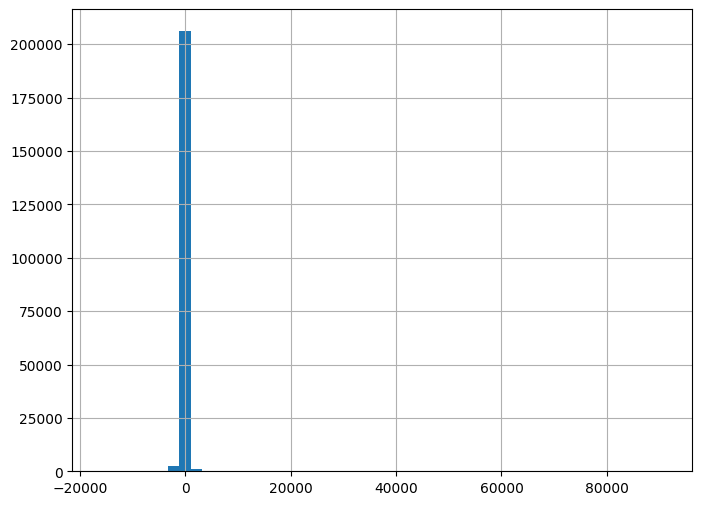

In [ ]:
merged_excluded_updated.difference.hist(bins= 50, figsize=(8,6));

In [ ]:
merged_excluded_updated['difference'].describe()

,difference
count,209510.000000
mean,1.238463
std,420.707179
min,-16129.960000
25%,0.000000
50%,0.000000
75%,6.990000
max,90898.610000


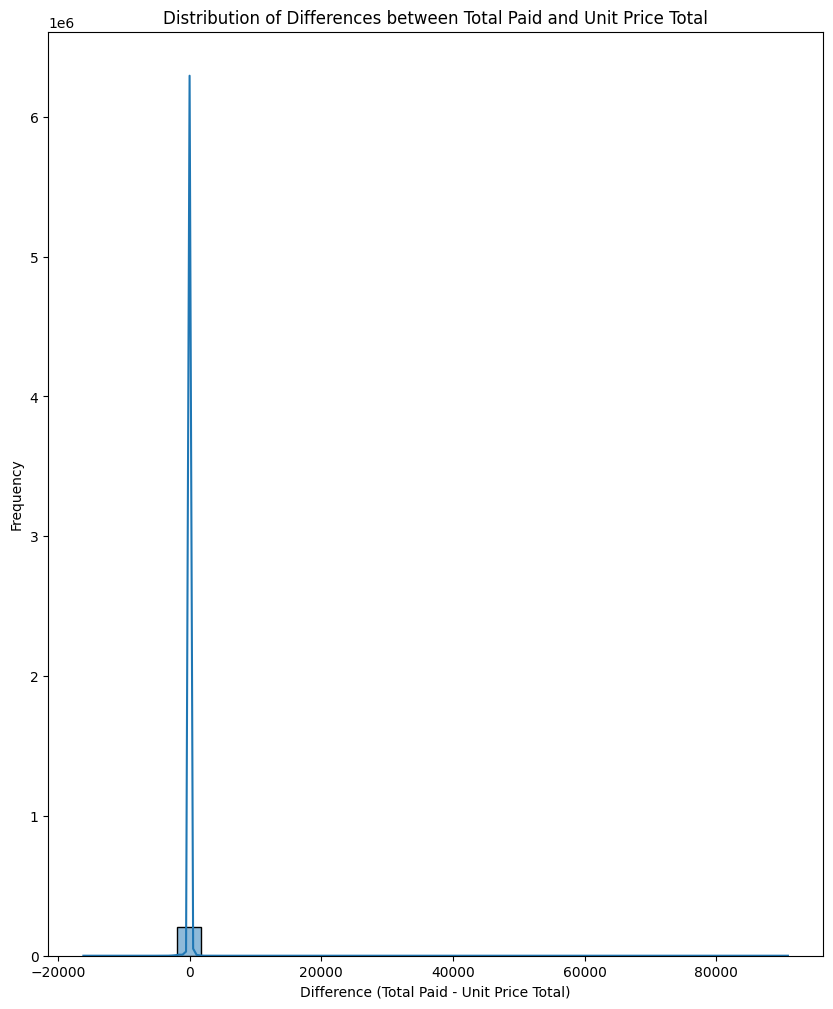

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of differences
plt.figure(figsize=(10, 12))
sns.histplot(merged_excluded_updated['difference'], kde=True, bins=30)
# Customize
plt.title('Distribution of Differences between Total Paid and Unit Price Total')
plt.xlabel('Difference (Total Paid - Unit Price Total)')
plt.ylabel('Frequency')
plt.show()



<Axes: >

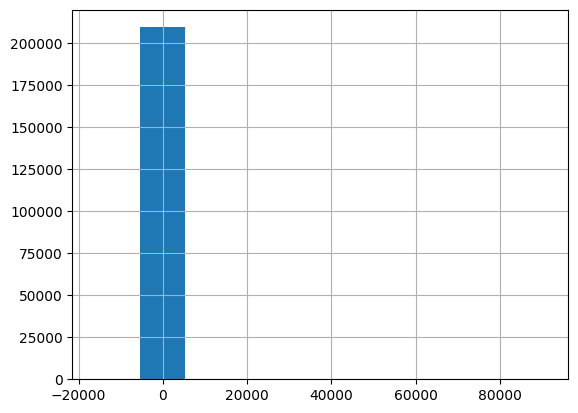

In [ ]:
merged_excluded_updated['difference'].hist()

### Can all the differences be explained by shipping costs? If not, what are other plausible explanations?

In [ ]:
#print them in column
merged_excluded_updated['difference_type'] = 'none'

merged_excluded_updated.loc[merged_excluded_updated['difference'] > 0, 'difference_type'] = 'delivery_cost'

merged_excluded_updated.loc[merged_excluded_updated['difference'] < 0, 'difference_type'] = 'promotion'

#to column
print(merged_excluded_updated['difference_type'].value_counts())


difference_type
none             98131
delivery_cost    79366
promotion        32013
Name: count, dtype: int64


### If there are differences that you can’t explain: what should you do with these orders?

In [ ]:
#
merged_full = merged_excluded_updated.merge(products_cl, on='sku', how='left')
merged_full = merged_full.drop(columns=['product_id'], errors='ignore')
merged_full

,id,id_order,product_quantity,sku,unit_price,date,created_date,total_paid,state,_merge,total_items,unit_price_total,difference,difference_type,name,desc,price,in_stock,type
0,1119109,299539,1,OTT0133,18.99,2017-01-01 00:07:19,2017-01-01 00:07:19,18.99,Shopping Basket,both,1,18.99,0.00,none,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 ...,resistant cover and thin beveled edges for iPh...,34.99,0,11865403
1,1119110,299540,1,LGE0043,399.00,2017-01-01 00:19:45,2017-01-01 00:19:45,399.00,Shopping Basket,both,1,399.00,0.00,none,"27UD58-B LG Monitor 27 ""4K UHD DisplayPort",Monitor for gamers and multimedia professional...,429.00,0,1296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209508,1650202,527388,1,BEZ0204,19.99,2018-03-14 13:58:01,2018-03-14 13:51:59,34.98,Shopping Basket,both,2,39.98,-5.00,promotion,"Be.ez LArobe Case Mix Macbook 12 ""Green",Macbook thin sheath 12 inches.,29.99,0,13835403
209509,1650203,527401,1,APP0927,13.99,2018-03-14 13:58:36,2018-03-14 13:58:36,18.98,Place Order,both,1,13.99,4.99,delivery_cost,EarPods Apple Headphones with Remote and Mic (...,EarPods headphones Apple iPhone iPad and iPod ...,35.00,1,5384


In [ ]:
merged_full['price_total'] = merged_full['total_items'] * merged_full['price']
merged_full

,id,id_order,product_quantity,sku,unit_price,date,created_date,total_paid,state,_merge,total_items,unit_price_total,difference,difference_type,name,desc,price,in_stock,type,price_total
0,1119109,299539,1,OTT0133,18.99,2017-01-01 00:07:19,2017-01-01 00:07:19,18.99,Shopping Basket,both,1,18.99,0.00,none,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 ...,resistant cover and thin beveled edges for iPh...,34.99,0,11865403,34.99
1,1119110,299540,1,LGE0043,399.00,2017-01-01 00:19:45,2017-01-01 00:19:45,399.00,Shopping Basket,both,1,399.00,0.00,none,"27UD58-B LG Monitor 27 ""4K UHD DisplayPort",Monitor for gamers and multimedia professional...,429.00,0,1296,429.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209508,1650202,527388,1,BEZ0204,19.99,2018-03-14 13:58:01,2018-03-14 13:51:59,34.98,Shopping Basket,both,2,39.98,-5.00,promotion,"Be.ez LArobe Case Mix Macbook 12 ""Green",Macbook thin sheath 12 inches.,29.99,0,13835403,59.98
209509,1650203,527401,1,APP0927,13.99,2018-03-14 13:58:36,2018-03-14 13:58:36,18.98,Place Order,both,1,13.99,4.99,delivery_cost,EarPods Apple Headphones with Remote and Mic (...,EarPods headphones Apple iPhone iPad and iPod ...,35.00,1,5384,35.00


In [ ]:
# in case of promotion it must be total_paid < price_total (total_items *price).
# difference is total_paid - unit_price_total

condition = (merged_full['difference'] < 0) & (merged_full['total_paid'] >merged_full['price_total'])&(merged_full['total_items'] < 2)

promotion_anomalies = merged_full[condition]

print(f"Number of rows where 'promotion' and total_paid < price_total: {len(promotion_anomalies)}")
promotion_anomalies

Number of rows where 'promotion' and total_paid < price_total: 4


,id,id_order,product_quantity,sku,unit_price,date,created_date,total_paid,state,_merge,total_items,unit_price_total,difference,difference_type,name,desc,price,in_stock,type,price_total
5298,1136005,305244,1,KIN0153-2,174.99,2017-01-08 23:42:45,2017-01-08 23:42:45,174.98,Place Order,both,1,174.99,-0.01,promotion,Mac memory Kingston 16GB (2x8GB) SO-DIMM DDR3å...,RAM 16GB MacBook Pro iMac (2013) and Mac mini ...,149.98,0,1364,149.98
8975,1144863,308923,1,LAC0197,92.99,2017-01-13 16:33:40,2017-01-13 17:26:31,92.98,Completed,both,1,92.99,-0.01,promotion,LaCie Porsche Design Mobile Hard Drive Disk US...,Aluminum External Hard Drive 1TB USB3.0 connec...,84.99,0,11935397,84.99
12577,1153290,312428,1,LAC0182,224.19,2017-01-20 11:00:33,2017-01-20 11:03:14,219.19,Pending,both,1,224.19,-5.00,promotion,LaCie Porsche Design Mobile Hard Drive 4TB USB...,4TB External Hard Drive USB-C and USB 3.0 conn...,199.99,0,11935397,199.99
17657,1165690,317549,1,SYN0163,241.29,2017-01-30 14:59:19,2017-01-31 00:29:15,240.28,Completed,both,1,241.29,-1.01,promotion,Synology RT2600AC Wifi Router AC2600,Wifi Wireless Router AC2600 17GHz dual-core an...,229.90,1,1334,229.90


In [ ]:
# in case of promotion it must be total_paid < price_total (total_items *price).
# difference is total_paid - unit_price_total

condition = (merged_full['difference'] < 0) & (merged_full['total_paid'] >merged_full['price_total'])
promotion_anomalies = merged_full[condition]

print(f"Number of rows where 'promotion' and total_paid < price_total: {len(promotion_anomalies)}")
promotion_anomalies

Number of rows where 'promotion' and total_paid < price_total: 158


,id,id_order,product_quantity,sku,unit_price,date,created_date,total_paid,state,_merge,total_items,unit_price_total,difference,difference_type,name,desc,price,in_stock,type,price_total
1308,1122180,300923,2,REP0060,39.91,2017-01-02 19:51:27,2017-01-02 19:51:27,79.81,Shopping Basket,both,2,79.82,-0.01,promotion,iPhone 4s battery repair,It is including parts and labor for iPhone 4s,29.99,0,"1,44E+11",59.98
1323,1122206,300939,2,REP0060,39.91,2017-01-02 20:07:48,2017-01-02 20:07:48,79.81,Shopping Basket,both,2,79.82,-0.01,promotion,iPhone 4s battery repair,It is including parts and labor for iPhone 4s,29.99,0,"1,44E+11",59.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183851,1579078,497940,1,CRU0021,84.99,2018-01-24 21:10:13,2018-01-24 21:09:50,165.49,Shopping Basket,both,2,169.98,-4.49,promotion,Crucial Mac Memory 8GB 1600MHZ DDR3 SO-DIMM,8GB RAM 135V / 15V MacBook iMac (2012/2013) Ma...,79.99,1,1364,159.98
183938,1579450,498076,1,BNQ0055,499.00,2018-01-24 23:43:09,2018-01-24 23:40:25,988.00,Shopping Basket,both,2,998.00,-10.00,promotion,"PD3200Q Monitor BenQ 32 ""LCD WQHD Professional...",Monitor 32 inch 100% sRGB height adjustable an...,466.00,1,1296,932.00


In [ ]:
# in case of delivery_assumption = total_paid > unit_price_total
# difference is total_paid - unit_price_total

#Initialize with "unknown"
merged_full['delivery_assumption'] = "unknown"

#Calculate the difference
delivery_diff = merged_full['total_paid'] - merged_full['unit_price_total']

merged_full.loc[delivery_diff > 0, 'delivery_assumption'] = delivery_diff[delivery_diff > 0]
merged_full.loc[delivery_diff < 0, 'delivery_assumption'] = delivery_diff[delivery_diff < 0]
merged_full.loc[delivery_diff == 0, 'delivery_assumption'] = "no delivery cost"
merged_full

,id,id_order,product_quantity,sku,unit_price,date,created_date,total_paid,state,_merge,total_items,unit_price_total,difference,difference_type,name,desc,price,in_stock,type,price_total,delivery_assumption
0,1119109,299539,1,OTT0133,18.99,2017-01-01 00:07:19,2017-01-01 00:07:19,18.99,Shopping Basket,both,1,18.99,0.00,none,Otterbox iPhone Case Symmetry 2.0 SE / 5s / 5 ...,resistant cover and thin beveled edges for iPh...,34.99,0,11865403,34.99,no delivery cost
1,1119110,299540,1,LGE0043,399.00,2017-01-01 00:19:45,2017-01-01 00:19:45,399.00,Shopping Basket,both,1,399.00,0.00,none,"27UD58-B LG Monitor 27 ""4K UHD DisplayPort",Monitor for gamers and multimedia professional...,429.00,0,1296,429.00,no delivery cost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209508,1650202,527388,1,BEZ0204,19.99,2018-03-14 13:58:01,2018-03-14 13:51:59,34.98,Shopping Basket,both,2,39.98,-5.00,promotion,"Be.ez LArobe Case Mix Macbook 12 ""Green",Macbook thin sheath 12 inches.,29.99,0,13835403,59.98,-5.0
209509,1650203,527401,1,APP0927,13.99,2018-03-14 13:58:36,2018-03-14 13:58:36,18.98,Place Order,both,1,13.99,4.99,delivery_cost,EarPods Apple Headphones with Remote and Mic (...,EarPods headphones Apple iPhone iPad and iPod ...,35.00,1,5384,35.00,4.99


In [ ]:
unknown_count = (merged_full['delivery_assumption'] == "unknown").sum()
print(f'Number of "unknown" values: {unknown_count}')
no_delivery_cost = (merged_full['delivery_assumption'] == "no delivery cost").sum()
print(f'Number of "unknown" values: {no_delivery_cost}')

Number of "unknown" values: 0
Number of "unknown" values: 98131


In [ ]:
# Count the negative values (only numeric)
negative_count = (merged_full['delivery_assumption'].astype(str).str.contains('-')).sum()

print(f'Number of negative (promotion) values: {negative_count}')

Number of negative (promotion) values: 32131


In [ ]:
merged_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209510 entries, 0 to 209509
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   209510 non-null  int64         
 1   id_order             209510 non-null  int64         
 2   product_quantity     209510 non-null  int64         
 3   sku                  209510 non-null  object        
 4   unit_price           209510 non-null  float64       
 5   date                 209510 non-null  datetime64[ns]
 6   created_date         209510 non-null  datetime64[ns]
 7   total_paid           209510 non-null  float64       
 8   state                209510 non-null  object        
 9   _merge               209510 non-null  category      
 10  total_items          209510 non-null  int64         
 11  unit_price_total     209510 non-null  float64       
 12  difference           209510 non-null  float64       
 13  difference_typ

## 5.&nbsp; Become confident about your dataset

Let's hear your thoughts about what you discovered.

In [ ]:
# your thoughts & code here

Do not forget to download your quality controlled DataFrames

In [ ]:
from google.colab import files

#orders_quality_controlled.to_csv("orders_qu.csv", index=False)
#files.download("orders_qu.csv")

#orderlines_quality_controlled.to_csv("orderlines_qu.csv", index=False)
#files.download("orderlines_qu.csv")